In [329]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [330]:
def sin_wave(A, omega, fai, length):
	# A*sin(ωt - φ)
	x = np.linspace(0, 2*np.pi*(length/omega), length)
	return A*np.sin(x - fai)
def cos_wave(A, omega, fai, length):
	# A*cos(ωt - φ)
	x = np.linspace(0, 2*np.pi*(length/omega), length)
	return A*np.cos(x - fai)

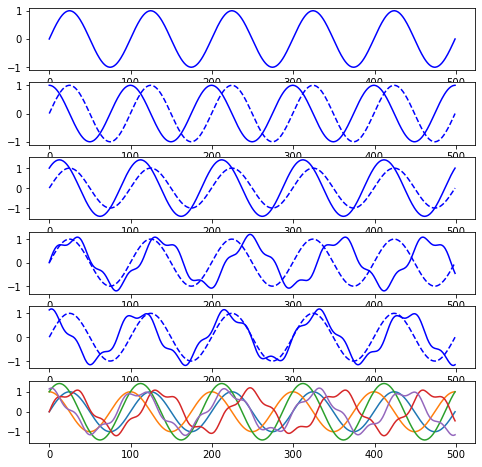

In [556]:
x1 = sin_wave(1, 100, 0, 500)
x2 = cos_wave(1, 100, 0, 500)
x3 = sin_wave(1, 100, 0, 500) + cos_wave(1, 100, 0, 500)
x4 = sin_wave(1, 110, 0, 500) + sin_wave(0.2, 30, 0, 500)
x5 = cos_wave(1, 110, 0, 500) + sin_wave(0.2, 30, -np.pi/4, 500)
# X = [x1, x2, x3, x4, x5]
X = np.array([x1,x2,x3,x4,x5]).T

plt.figure(figsize=(8,8))
plt.subplot(611)
plt.plot(x1,color='b')
plt.subplot(612)
plt.plot(x2,color='b')
plt.plot(x1,color='b',linestyle='dashed')
plt.subplot(613)
plt.plot(x3,color='b')
plt.plot(x1,color='b',linestyle='dashed')
plt.subplot(614)
plt.plot(x4,color='b')
plt.plot(x1,color='b',linestyle='dashed')
plt.subplot(615)
plt.plot(x5,color='b')
plt.plot(x1,color='b',linestyle='dashed')
plt.subplot(616)
plt.plot(X)

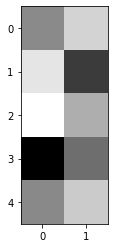

In [559]:
pca = PCA(n_components=2)
feature = pca.fit_transform(X.T)
plt.imshow(feature, cmap='binary')

In [604]:
U, s, V = np.linalg.svd(X, full_matrices=False)
S = np.diag(s)
print('U', U.shape)
print('S', S.shape)
print('V', V.shape)

sigma_s=0
for i in range(len(s)):
	sigma_s += s[i]
	if sigma_s/sum(s) > 0.95:
		print(i)
		h = i
		break

U (500, 5)
S (5, 5)
V (5, 5)
3


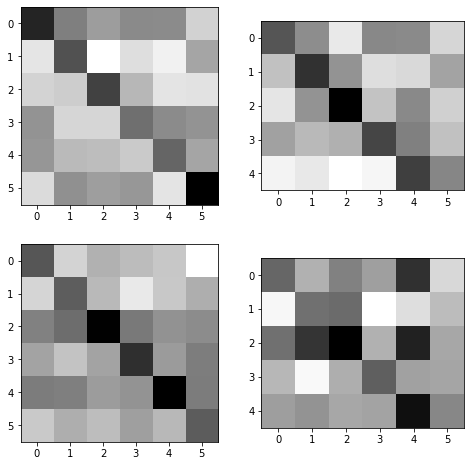

In [606]:
from pykalman import KalmanFilter

n_dim_state = 6
n_dim_obs = X.shape[1]

miu = np.random.rand(n_dim_state)
A = np.eye(n_dim_state, n_dim_state)+ np.random.rand(n_dim_state, n_dim_state)
C = np.eye(n_dim_obs, n_dim_state)+ np.random.rand(n_dim_obs, n_dim_state)
Q = np.eye(n_dim_state, n_dim_state)
R = np.eye(n_dim_obs, n_dim_obs)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(A, cmap='binary')
plt.subplot(222)
plt.imshow(C, cmap='binary')


kf = KalmanFilter( initial_state_mean=miu,
				initial_state_covariance=Q,
				transition_matrices=A,
				transition_covariance=Q,
				observation_matrices=C,
				observation_covariance=R)
	
kf.em(X,em_vars=['transition_matrices','transition_covariance', 'observation_matrices','observation_covariance'],n_iter=10)
A = kf.transition_matrices
C = kf.observation_matrices

	

plt.subplot(223)
plt.imshow(A, cmap='binary')
plt.subplot(224)
plt.imshow(C, cmap='binary')

ValueError: could not broadcast input array from shape (6,5) into shape (6,1)

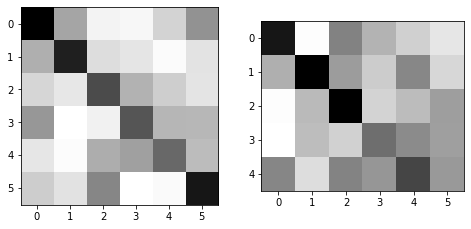

In [608]:
from pykalman import KalmanFilter

n_dim_state = 6
n_dim_obs = X.shape[1]

miu = np.random.rand(n_dim_state)
A = np.eye(n_dim_state, n_dim_state)+ np.random.rand(n_dim_state, n_dim_state)
C = np.eye(n_dim_obs, n_dim_state)+ np.random.rand(n_dim_obs, n_dim_state)
Q = np.eye(n_dim_state, n_dim_state)
R = np.eye(n_dim_obs, n_dim_obs)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(A, cmap='binary')
plt.subplot(222)
plt.imshow(C, cmap='binary')


kf = KalmanFilter( initial_state_mean=miu,
				initial_state_covariance=Q,
				transition_matrices=A,
				transition_covariance=Q,
				observation_matrices=C,
				observation_covariance=R)
	

for i, x in enumerate(X):
	# kf.em(x,em_vars=['transition_matrices','transition_covariance', 'observation_matrices','observation_covariance'],n_iter=10)
	# A = kf.transition_matrices
	# C = kf.observation_matrices
	# kf.filter_update()

	

plt.subplot(223)
plt.imshow(A, cmap='binary')
plt.subplot(224)
plt.imshow(C, cmap='binary')

In [587]:
def eigen_decomposition(A):
	#A = V D V.inv
	d, V = np.linalg.eig(A) #d: eigen value, V: eigen vector
	D = np.diag(d)
	V_inv = np.linalg.inv(V)
	return V, D, V_inv

	
V, Are, V_inv = eigen_decomposition(A)
Ch = np.dot(C, V)
print('Ch',Ch)

Ch [[-1.00667497e-06+0.j          3.87413028e-06+0.j
  -6.73579605e-03+0.00879316j -6.73579605e-03-0.00879316j
   9.30417697e-02-0.10224653j  9.30417697e-02+0.10224653j]
 [-7.31851681e-07+0.j          5.53761128e-06+0.j
  -8.97492286e-03-0.00721574j -8.97492286e-03+0.00721574j
   1.01765543e-01+0.09303337j  1.01765543e-01-0.09303337j]
 [-1.73852665e-06+0.j          9.41174156e-06+0.j
  -1.57107189e-02+0.00157742j -1.57107189e-02-0.00157742j
   1.94807312e-01-0.00921316j  1.94807312e-01+0.00921316j]
 [ 5.81015930e-04+0.j         -2.40100766e-03+0.j
  -2.75534796e-02-0.28045652j -2.75534796e-02+0.28045652j
  -2.93955715e-01-0.12578921j -2.93955715e-01+0.12578921j]
 [ 5.90422751e-04+0.j         -2.65816570e-03+0.j
   2.83195093e-01-0.04633825j  2.83195093e-01+0.04633825j
   1.12258706e-01-0.30073296j  1.12258706e-01+0.30073296j]]


[[1.00667497e-06 3.87413028e-06 1.10765796e-02 1.10765796e-02
  1.38242986e-01 1.38242986e-01]
 [7.31851681e-07 5.53761128e-06 1.15159064e-02 1.15159064e-02
  1.37881954e-01 1.37881954e-01]
 [1.73852665e-06 9.41174156e-06 1.57897103e-02 1.57897103e-02
  1.95025053e-01 1.95025053e-01]
 [5.81015930e-04 2.40100766e-03 2.81806767e-01 2.81806767e-01
  3.19738780e-01 3.19738780e-01]
 [5.90422751e-04 2.65816570e-03 2.86961137e-01 2.86961137e-01
  3.21002073e-01 3.21002073e-01]]


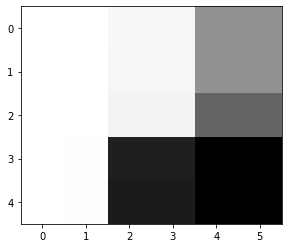

In [588]:
Cm = abs(Ch)
print(Cm)
plt.imshow(Cm, cmap='binary')

[[ 0.01827257  0.21987197]
 [ 0.01822783  0.21933603]
 [ 0.08020191  0.22643434]
 [ 0.40568839 -0.02940136]
 [ 0.41074407 -0.03468905]]


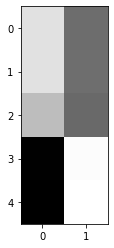

In [605]:
k=2
Cm_ = Cm - np.mean(Cm)
U, s, V = np.linalg.svd(Cm_, full_matrices=False)
S = np.diag(s)
# print('U', U.shape)
# print('S', S.shape)
# print('V', V.shape)

def reconstract_svd(U, S, V):
	return np.dot(np.dot(U, S), V)


F = np.dot(U[:, :k], S[:k, :k])
plt.imshow(F, cmap='binary')
print(F)

[[ 0.16696889  0.10290296]
 [ 0.16692419  0.10210002]
 [ 0.23568654  0.14498285]
 [ 0.60029705 -0.05427175]
 [ 0.60604697 -0.05909755]]


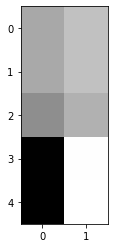

In [590]:
from sklearn.decomposition import TruncatedSVD
k=2

svd = TruncatedSVD(k)
F = svd.fit_transform(Cm)
print(F)
plt.imshow(F, cmap='binary')

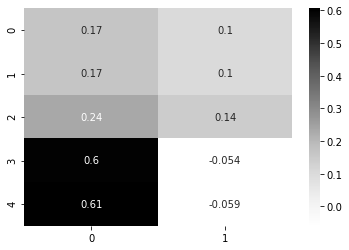

In [603]:
import seaborn as sns
sns.heatmap(data=F, annot=True, cmap='Greys',)